In [0]:
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif
from sklearn.decomposition import PCA
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)
import xgboost
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, SelectKBest, f_classif, chi2
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.externals import joblib
from math import sqrt

In [0]:
url = 'https://raw.githubusercontent.com/KrowosDogg/machine_learning/master/dataset_norm.csv'
data = pd.read_csv(url).drop(['Unnamed: 0', 'Left MD', 'Right MD', 'Mean fix duration', 'Mean sac duration', 'Mean Amplitude', 'Mean Peak Velocity', 'Fixatoin Trajectory Length', 'VA (log)', ' Contrast Sensitivity(Log)'], axis = 1)
data

,ID,Study eye,Sex,Age (years),Number of fix points,Number of sacs,Number of fix points per DadsArmy,Number of sacs pers DadsArmy,Mean fix duration per DadsArmy,Mean sac duration per DadsArmy,...,Mean Peak Velocity per HistoryBoys,Number of fix points per SkiCross,Number of sacs pers SkiCross,Mean fix duration per SkiCross,Mean sac duration per SkiCross,Mean Amplitude per SkiCross,Mean Peak Velocity per SkiCross,Fixatoin Trajectory Length DadsArmy,Fixatoin Trajectory Length HistoryBoys,Fixatoin Trajectory Length SkiCross
0,C001,L,F,71.0,2813.0,2811.0,915.0,913.0,237.000000,98.526835,...,236.654459,1270.0,1270.0,269.551181,72.959843,3.592236,242.873228,168139.167196,75605.855499,197018.851007
1,C002,L,F,67.0,2255.0,2247.0,688.0,682.0,347.122093,66.939883,...,247.385230,1066.0,1064.0,282.370544,127.770677,3.890169,270.405075,152484.869311,76350.548004,180468.038348
2,C003,L,F,71.0,2212.0,2204.0,188.0,182.0,228.127660,355.527473,...,299.799645,1458.0,1458.0,246.456790,52.229767,3.834335,301.810014,33107.568247,69765.937899,238561.816595
3,C004,L,M,74.0,2579.0,2566.0,897.0,895.0,284.626533,57.680447,...,311.817029,1124.0,1119.0,333.692171,54.594281,3.463923,253.120643,182526.489187,77136.325520,160858.930416
4,C005,L,F,62.0,2108.0,2105.0,670.0,669.0,329.755224,126.361734,...,333.155612,1044.0,1044.0,363.849617,94.135057,3.974914,274.627395,169914.400521,66920.877881,184559.690118
5,C006,L,M,71.0,2685.0,2676.0,785.0,779.0,330.997452,60.887035,...,331.915094,1368.0,1367.0,277.064327,42.073884,4.238157,242.099488,175795.254644,85106.950813,247084.695176
6,C007,R,M,78.0,1927.0,1918.0,608.0,605.0,452.011513,53.661157,...,287.804878,948.0,944.0,416.127637,43.621822,3.667680,270.405720,129411.227676,56355.876957,145646.278443
7,C008,L,F,67.0,2087.0,2081.0,702.0,699.0,316.853276,121.015737,...,395.448133,901.0,900.0,398.598224,86.845556,3.594500,262.058889,144742.551535,78767.737527,144268.257637
8,C009,L,M,66.0,2147.0,2145.0,639.0,639.0,439.502347,43.456964,...,229.755411,1045.0,1044.0,375.585646,42.402299,4.180862,261.227969,144986.257992,66758.287129,182350.292469
9,C010,L,F,75.0,1916.0,1910.0,591.0,588.0,468.228426,54.360544,...,276.812834,950.0,948.0,423.142105,37.275316,4.259219,258.237342,117704.885652,57589.828116,171692.630587


In [0]:
data['Target'] = pd.DataFrame([data['ID'].values[i][0] for i in range(data['ID'].values.shape[0])])
data['Target'] = data['Target'].replace('C', 0)
data['Target'] = data['Target'].replace('G', 1)
data = data.drop('ID', axis = 1)
data

,Study eye,Sex,Age (years),Number of fix points,Number of sacs,Number of fix points per DadsArmy,Number of sacs pers DadsArmy,Mean fix duration per DadsArmy,Mean sac duration per DadsArmy,Mean Amplitude per DadsArmy,...,Number of fix points per SkiCross,Number of sacs pers SkiCross,Mean fix duration per SkiCross,Mean sac duration per SkiCross,Mean Amplitude per SkiCross,Mean Peak Velocity per SkiCross,Fixatoin Trajectory Length DadsArmy,Fixatoin Trajectory Length HistoryBoys,Fixatoin Trajectory Length SkiCross,Target
0,L,F,71.0,2813.0,2811.0,915.0,913.0,237.000000,98.526835,4.154129,...,1270.0,1270.0,269.551181,72.959843,3.592236,242.873228,168139.167196,75605.855499,197018.851007,0
1,L,F,67.0,2255.0,2247.0,688.0,682.0,347.122093,66.939883,5.263460,...,1066.0,1064.0,282.370544,127.770677,3.890169,270.405075,152484.869311,76350.548004,180468.038348,0
2,L,F,71.0,2212.0,2204.0,188.0,182.0,228.127660,355.527473,3.752143,...,1458.0,1458.0,246.456790,52.229767,3.834335,301.810014,33107.568247,69765.937899,238561.816595,0
3,L,M,74.0,2579.0,2566.0,897.0,895.0,284.626533,57.680447,4.763039,...,1124.0,1119.0,333.692171,54.594281,3.463923,253.120643,182526.489187,77136.325520,160858.930416,0
4,L,F,62.0,2108.0,2105.0,670.0,669.0,329.755224,126.361734,5.840060,...,1044.0,1044.0,363.849617,94.135057,3.974914,274.627395,169914.400521,66920.877881,184559.690118,0
5,L,M,71.0,2685.0,2676.0,785.0,779.0,330.997452,60.887035,5.298151,...,1368.0,1367.0,277.064327,42.073884,4.238157,242.099488,175795.254644,85106.950813,247084.695176,0
6,R,M,78.0,1927.0,1918.0,608.0,605.0,452.011513,53.661157,5.115653,...,948.0,944.0,416.127637,43.621822,3.667680,270.405720,129411.227676,56355.876957,145646.278443,0
7,L,F,67.0,2087.0,2081.0,702.0,699.0,316.853276,121.015737,4.819227,...,901.0,900.0,398.598224,86.845556,3.594500,262.058889,144742.551535,78767.737527,144268.257637,0
8,L,M,66.0,2147.0,2145.0,639.0,639.0,439.502347,43.456964,5.259577,...,1045.0,1044.0,375.585646,42.402299,4.180862,261.227969,144986.257992,66758.287129,182350.292469,0
9,L,F,75.0,1916.0,1910.0,591.0,588.0,468.228426,54.360544,4.549371,...,950.0,948.0,423.142105,37.275316,4.259219,258.237342,117704.885652,57589.828116,171692.630587,0


In [0]:
ss = data.iloc[:, 0]
le = preprocessing.LabelEncoder()
n = le.fit(data.iloc[:, 0])
ss = le.transform(ss)

eye = pd.DataFrame(ss, columns = ['Eye'])
data = data.drop('Study eye', axis = 1)
data = pd.concat([data, eye], axis = 1)
data

,Sex,Age (years),Number of fix points,Number of sacs,Number of fix points per DadsArmy,Number of sacs pers DadsArmy,Mean fix duration per DadsArmy,Mean sac duration per DadsArmy,Mean Amplitude per DadsArmy,Mean Peak Velocity per DadsArmy,...,Number of sacs pers SkiCross,Mean fix duration per SkiCross,Mean sac duration per SkiCross,Mean Amplitude per SkiCross,Mean Peak Velocity per SkiCross,Fixatoin Trajectory Length DadsArmy,Fixatoin Trajectory Length HistoryBoys,Fixatoin Trajectory Length SkiCross,Target,Eye
0,F,71.0,2813.0,2811.0,915.0,913.0,237.000000,98.526835,4.154129,283.085433,...,1270.0,269.551181,72.959843,3.592236,242.873228,168139.167196,75605.855499,197018.851007,0,0
1,F,67.0,2255.0,2247.0,688.0,682.0,347.122093,66.939883,5.263460,326.051320,...,1064.0,282.370544,127.770677,3.890169,270.405075,152484.869311,76350.548004,180468.038348,0,0
2,F,71.0,2212.0,2204.0,188.0,182.0,228.127660,355.527473,3.752143,315.824176,...,1458.0,246.456790,52.229767,3.834335,301.810014,33107.568247,69765.937899,238561.816595,0,0
3,M,74.0,2579.0,2566.0,897.0,895.0,284.626533,57.680447,4.763039,244.035754,...,1119.0,333.692171,54.594281,3.463923,253.120643,182526.489187,77136.325520,160858.930416,0,0
4,F,62.0,2108.0,2105.0,670.0,669.0,329.755224,126.361734,5.840060,365.349776,...,1044.0,363.849617,94.135057,3.974914,274.627395,169914.400521,66920.877881,184559.690118,0,0
5,M,71.0,2685.0,2676.0,785.0,779.0,330.997452,60.887035,5.298151,310.326059,...,1367.0,277.064327,42.073884,4.238157,242.099488,175795.254644,85106.950813,247084.695176,0,0
6,M,78.0,1927.0,1918.0,608.0,605.0,452.011513,53.661157,5.115653,316.535537,...,944.0,416.127637,43.621822,3.667680,270.405720,129411.227676,56355.876957,145646.278443,0,1
7,F,67.0,2087.0,2081.0,702.0,699.0,316.853276,121.015737,4.819227,479.781116,...,900.0,398.598224,86.845556,3.594500,262.058889,144742.551535,78767.737527,144268.257637,0,0
8,M,66.0,2147.0,2145.0,639.0,639.0,439.502347,43.456964,5.259577,264.586854,...,1044.0,375.585646,42.402299,4.180862,261.227969,144986.257992,66758.287129,182350.292469,0,0
9,F,75.0,1916.0,1910.0,591.0,588.0,468.228426,54.360544,4.549371,290.627551,...,948.0,423.142105,37.275316,4.259219,258.237342,117704.885652,57589.828116,171692.630587,0,0


In [0]:
se = data.iloc[:, 0].fillna('M')
le_sex = preprocessing.LabelEncoder()
le_sex.fit(data.iloc[:, 0].fillna('M'))
se= le_sex.transform(se)

sex = pd.DataFrame(se, columns = ['sex'])
data = data.drop('Sex', axis = 1)
data = pd.concat([data, sex], axis = 1)
data

,Age (years),Number of fix points,Number of sacs,Number of fix points per DadsArmy,Number of sacs pers DadsArmy,Mean fix duration per DadsArmy,Mean sac duration per DadsArmy,Mean Amplitude per DadsArmy,Mean Peak Velocity per DadsArmy,Number of fix points per HistoryBoys,...,Mean fix duration per SkiCross,Mean sac duration per SkiCross,Mean Amplitude per SkiCross,Mean Peak Velocity per SkiCross,Fixatoin Trajectory Length DadsArmy,Fixatoin Trajectory Length HistoryBoys,Fixatoin Trajectory Length SkiCross,Target,Eye,sex
0,71.0,2813.0,2811.0,915.0,913.0,237.000000,98.526835,4.154129,283.085433,628.0,...,269.551181,72.959843,3.592236,242.873228,168139.167196,75605.855499,197018.851007,0,0,0
1,67.0,2255.0,2247.0,688.0,682.0,347.122093,66.939883,5.263460,326.051320,501.0,...,282.370544,127.770677,3.890169,270.405075,152484.869311,76350.548004,180468.038348,0,0,0
2,71.0,2212.0,2204.0,188.0,182.0,228.127660,355.527473,3.752143,315.824176,566.0,...,246.456790,52.229767,3.834335,301.810014,33107.568247,69765.937899,238561.816595,0,0,0
3,74.0,2579.0,2566.0,897.0,895.0,284.626533,57.680447,4.763039,244.035754,558.0,...,333.692171,54.594281,3.463923,253.120643,182526.489187,77136.325520,160858.930416,0,0,1
4,62.0,2108.0,2105.0,670.0,669.0,329.755224,126.361734,5.840060,365.349776,394.0,...,363.849617,94.135057,3.974914,274.627395,169914.400521,66920.877881,184559.690118,0,0,0
5,71.0,2685.0,2676.0,785.0,779.0,330.997452,60.887035,5.298151,310.326059,532.0,...,277.064327,42.073884,4.238157,242.099488,175795.254644,85106.950813,247084.695176,0,0,1
6,78.0,1927.0,1918.0,608.0,605.0,452.011513,53.661157,5.115653,316.535537,371.0,...,416.127637,43.621822,3.667680,270.405720,129411.227676,56355.876957,145646.278443,0,1,1
7,67.0,2087.0,2081.0,702.0,699.0,316.853276,121.015737,4.819227,479.781116,484.0,...,398.598224,86.845556,3.594500,262.058889,144742.551535,78767.737527,144268.257637,0,0,0
8,66.0,2147.0,2145.0,639.0,639.0,439.502347,43.456964,5.259577,264.586854,463.0,...,375.585646,42.402299,4.180862,261.227969,144986.257992,66758.287129,182350.292469,0,0,1
9,75.0,1916.0,1910.0,591.0,588.0,468.228426,54.360544,4.549371,290.627551,375.0,...,423.142105,37.275316,4.259219,258.237342,117704.885652,57589.828116,171692.630587,0,0,0


In [0]:
y = data['Target']
data = data.drop(['Target'], axis = 1)

data_median = data
data_median = data_median.fillna(data_median.median())

In [0]:
data_median

,Age (years),Number of fix points,Number of sacs,Number of fix points per DadsArmy,Number of sacs pers DadsArmy,Mean fix duration per DadsArmy,Mean sac duration per DadsArmy,Mean Amplitude per DadsArmy,Mean Peak Velocity per DadsArmy,Number of fix points per HistoryBoys,...,Number of sacs pers SkiCross,Mean fix duration per SkiCross,Mean sac duration per SkiCross,Mean Amplitude per SkiCross,Mean Peak Velocity per SkiCross,Fixatoin Trajectory Length DadsArmy,Fixatoin Trajectory Length HistoryBoys,Fixatoin Trajectory Length SkiCross,Eye,sex
0,71.0,2813.0,2811.0,915.0,913.0,237.000000,98.526835,4.154129,283.085433,628.0,...,1270.0,269.551181,72.959843,3.592236,242.873228,168139.167196,75605.855499,197018.851007,0,0
1,67.0,2255.0,2247.0,688.0,682.0,347.122093,66.939883,5.263460,326.051320,501.0,...,1064.0,282.370544,127.770677,3.890169,270.405075,152484.869311,76350.548004,180468.038348,0,0
2,71.0,2212.0,2204.0,188.0,182.0,228.127660,355.527473,3.752143,315.824176,566.0,...,1458.0,246.456790,52.229767,3.834335,301.810014,33107.568247,69765.937899,238561.816595,0,0
3,74.0,2579.0,2566.0,897.0,895.0,284.626533,57.680447,4.763039,244.035754,558.0,...,1119.0,333.692171,54.594281,3.463923,253.120643,182526.489187,77136.325520,160858.930416,0,1
4,62.0,2108.0,2105.0,670.0,669.0,329.755224,126.361734,5.840060,365.349776,394.0,...,1044.0,363.849617,94.135057,3.974914,274.627395,169914.400521,66920.877881,184559.690118,0,0
5,71.0,2685.0,2676.0,785.0,779.0,330.997452,60.887035,5.298151,310.326059,532.0,...,1367.0,277.064327,42.073884,4.238157,242.099488,175795.254644,85106.950813,247084.695176,0,1
6,78.0,1927.0,1918.0,608.0,605.0,452.011513,53.661157,5.115653,316.535537,371.0,...,944.0,416.127637,43.621822,3.667680,270.405720,129411.227676,56355.876957,145646.278443,1,1
7,67.0,2087.0,2081.0,702.0,699.0,316.853276,121.015737,4.819227,479.781116,484.0,...,900.0,398.598224,86.845556,3.594500,262.058889,144742.551535,78767.737527,144268.257637,0,0
8,66.0,2147.0,2145.0,639.0,639.0,439.502347,43.456964,5.259577,264.586854,463.0,...,1044.0,375.585646,42.402299,4.180862,261.227969,144986.257992,66758.287129,182350.292469,0,1
9,75.0,1916.0,1910.0,591.0,588.0,468.228426,54.360544,4.549371,290.627551,375.0,...,948.0,423.142105,37.275316,4.259219,258.237342,117704.885652,57589.828116,171692.630587,0,0


In [0]:
def MyGridSearchClf (X, y, acc, n_features, n_components):
    random_state = 112
    
    app = []
    #dict1 = None
    #dict2 = None
    #dict3 = None
    # list of Regression methods
    classification_models = []
    classification_models += [RandomForestClassifier(random_state=random_state)]
    classification_models += [svm.SVC(random_state=random_state, probability = True)]
    classification_models += [KNeighborsClassifier()]
    classification_models += [LogisticRegression()]
    classification_models += [xgboost.XGBClassifier()]
    classification_models += [GaussianNB()]
    
    #RFC
    rfc_max_features = ['sqrt']
    rfc_max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    rfc_n_estimators = [1, 2, 5, 10, 50, 100, 200, 300, 500, 1000, 2000]
    rfc_bootstrap = [True, False]
    rfc_min_samples_split = [2, 5, 10]
    rfc_min_samples_leaf = [1, 2, 4]
    #SVC
    svc_gamma = [1e-3, 1e-4]
    svc_C = [0.1,0.5,0.6, 0.7, 1, 10, 20]
    
    #KNC
    knc_n_neighbors =  [1, 2, 3, 5, 10, 15, 20]
    knc_algorithm = ['ball_tree', 'kd_tree']
    
    #LR
    lr_C = np.logspace(-3,3,7)
    #lr_penalty = ["l1","l2"]
    #lr_solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    #XGB
    xgb_min_child_weight = [1, 5, 10]
    xgb_gamma =  [0.5, 1, 1.5, 2, 5]
    xgb_subsample = [0.6, 0.8, 1.0]
    xgb_colsample_bytree = [0.6, 0.8, 1.0]
    xgb_max_depth = [3, 4, 5]
      
    #GNB
    gnb_var_smoothing = np.logspace(-1,-10,10)
    
    # list of dimensionality reduction methods
    dim_reduction_methods = []
    dim_reduction_methods += [None]
    #dim_reduction_methods += [SelectKBest(stats.ttest_ind)]
    dim_reduction_methods += [SelectKBest(f_classif)]
    dim_reduction_methods += [SelectPercentile(score_func = f_classif)]
    dim_reduction_methods += [PCA(random_state=random_state)]
    dim_reduction_methods += [LocallyLinearEmbedding(random_state=random_state)]

    scores = []
    paras = []
    estim = []
    stds = []
    CVS = []
    for clf_model in tqdm(classification_models):
        score = []
        para = []
        feature = []
        est = []
        std = []
        CV = []
        for red_method in tqdm(dim_reduction_methods):
            param_grid = {}
            
            pipe = Pipeline([
            ('StdScaler', StandardScaler()),
            ("VarTh", VarianceThreshold()),
            ('dim_reduction', red_method),
            ('classifier', clf_model),
            ])
            
            if red_method == None:
                pipe = Pipeline([
                ('StdScaler', StandardScaler()),
                ("VarTh", VarianceThreshold()),
                ('classifier', clf_model),
                ])
                
            if red_method == dim_reduction_methods[1]: #or red_method == dim_reduction_methods[2]:# or red_method == dim_reduction_methods[3]:
                param_grid = {
                    'dim_reduction__k': n_features,
                    }
                
            if red_method == dim_reduction_methods[2]:# or red_method == dim_reduction_methods[5]:
                param_grid = {
                    'dim_reduction__percentile': n_features,
                    }
            
            if  red_method == dim_reduction_methods[3] or red_method == dim_reduction_methods[4]:
                param_grid = {
                    'dim_reduction__n_components': n_components,
                    }
            
            if clf_model == classification_models[0]:
                #print('Performing RFC')
                param_grid['classifier__n_estimators'] = rfc_n_estimators
                #param_grid['classifier__max_features'] = rfc_max_features
                #param_grid['classifier__min_samples_split'] = rfc_min_samples_split
                #param_grid['classifier__max_depth'] = rfc_max_depth
                #param_grid['classifier__min_samples_leaf'] = rfc_min_samples_leaf
                #param_grid['classifier__bootstrap'] = rfc_bootstrap
            
            if clf_model == classification_models[1]:
                #print('Performing SVC')
                param_grid['classifier__gamma'] = svc_gamma
                param_grid['classifier__C'] = svc_C
                
            if clf_model == classification_models[2]:
                #print('Performing KNR')
                param_grid['classifier__n_neighbors'] = knc_n_neighbors
                param_grid['classifier__algorithm'] = knc_algorithm
            
                
            if clf_model == classification_models[3]:
                #print('Performing LR')
                param_grid['classifier__C'] = lr_C
                #param_grid['classifier__solver'] = lr_solver
                #param_grid['classifier__solver'] = lr_penalty
            
                
            if clf_model == classification_models[4]:
                #print('Performing XGB')
                #param_grid['classifier__max_depth'] = xgb_max_depth
                #param_grid['classifier__min_child_weight'] = xgb_min_child_weight
                param_grid['classifier__gamma'] = xgb_gamma
                #param_grid['classifier__subsample'] = xgb_subsample
                #param_grid['classifier__colsample_bytree'] = xgb_colsample_bytree
                param_grid['classifier__max_depth'] = xgb_max_depth
            
            if clf_model == classification_models[5]:
                #print('Performing GNB')
                #param_grid['classifier__C'] = svr_C
                #param_grid['classifier__kernel'] = svr_kernel
                param_grid['classifier__var_smoothing'] = gnb_var_smoothing
            
    #kfold = KFold(y.size, shuffle=True, n_folds=10, random_state = 32)
            kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats = 3, random_state = random_state)
            CV_clf = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = kfold, scoring = acc)
            CV_clf.fit(X, y)
            #print ("Model best params:", CV_clf.best_params_)
            #clf_params=CV_clf.best_params_
    #with open('out.txt', 'w') as f:
    #print ('Model best estimator:', CV_clf.best_estimator_,) #file=f)
            #print ('Model best score:', CV_clf.best_score_ )
            score.append(np.abs(CV_clf.best_score_))
            std.append(CV_clf.cv_results_['std_test_score'][CV_clf.best_index_])
            para.append(CV_clf.best_params_)
            est.append(CV_clf.best_estimator_)
            CV.append(CV_clf)
            #feature.append(CV_clf.best_estimator_.named_steps['regressor'].coef_)
            #app.append(CV_clf.cv_results_ )
        scores.append(score)
        paras.append(para)
        estim.append(est)
        stds.append(std)
        CVS.append(CV)
    head = ['None', 'SelectKBest(f_classif)', 'SelectPercentile(f_classif)' ,'PCA', 'LLE' ]
    ix = ['RFC', 'SVC', 'KNC', 'LR', 'XGB', 'GNB']
    #print(scores)
    #print(pd.DataFrame(scores,  columns = head, index = ix))
    return pd.DataFrame(scores,  columns = head, index = ix), pd.DataFrame(paras,  columns = head, index = ix), pd.DataFrame(estim,  columns = head, index = ix), pd.DataFrame(stds,  columns = head, index = ix), pd.DataFrame(CVS,  columns = head, index = ix)

In [1]:
def fit_predict(model, X, ):
    y_pred = CV_clf.predict(X)
    y_proba = CV_clf.predict_proba(X)[:,1]
    result_report(y, y_pred, y_prob)
    return(y_true, y_pred, y_prob)

In [0]:
def result_report(y_true, y_pred, y_prob, filename = None): 
        
    #main metrics
    print(classification_report(y_true, y_pred, target_names=['Control','Glaucoma']))
    aps = average_precision_score(y_true, y_pred) 
    ras = roc_auc_score(y_true, y_prob)
    fig = plt.figure(figsize = (20,5))
    
    #precision recall curve
    plt.subplot(1,3,1)
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.step(recall, precision, color='b', alpha=0.2,where='post', lw = 2)
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
    plt.xlabel('Recall',fontsize = 15)
    plt.ylabel('Precision',fontsize = 15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(aps),fontsize = 20)
    
    #roc auc
    plt.subplot(1,3,2)
    plt.title('ROC-curve: ROC-AUC={0:0.2f}'.format(ras),fontsize = 20)
    plt.xlabel('True Positive Rate',fontsize = 15)
    plt.ylabel('False Positive Rate',fontsize = 15)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, lw = 2)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.plot([0, 1], [0, 1], linestyle='--', lw = 2)
    
    #confusion matrix
    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cbar=False, linewidths=.5, annot_kws={"size": 20})
    plt.title('Confusion matrix',fontsize = 20)
    plt.ylabel('True label',fontsize = 15)
    plt.xlabel('Predicted label',fontsize = 15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    if filename:
        plt.savefig(filename, bbox_inches='tight', dpi =200)
    plt.show()
    
    return classification_report(y_true, y_pred, target_names=['Glaucoma', 'Control'],output_dict=True)

#using prefitted clf!
def roc_concat(clf_list, y_true, y_prob, filename = None):
    plt.figure(figsize = (7,7))
    for i in range(len(clf_list)):
        fpr, tpr, _ = roc_curve(y_true, y_prob[i])
        plt.plot(fpr, tpr, label = '{}, ROC-AUC={}'.format(clf_list[i].named_steps['classifier'].__class__.__name__, round(roc_auc_score(y_true, y_prob[i]), 3)), lw = 2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw =2 , color = 'black')
    plt.title('ROC-curve for best parameters',fontsize = 20)
    plt.xlabel('True Positive Rate',fontsize = 15)
    plt.ylabel('False Positive Rate',fontsize = 15)
    plt.legend(prop={'size': 12})
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.grid(True)
    if filename:
        plt.savefig(filename, bbox_inches='tight', dpi =200)
    plt.show()    

In [0]:
n_objects = data.shape[0]


def repeated_cross_val_predict(estimator, X, y, cv, file=None):
    predictions = [[] for i in range(n_objects)]
    for idx_tr, idx_te in cv.split(X, y):
        estimator.fit(X.iloc[idx_tr], y.iloc[idx_tr])
        pred_te = np.array(estimator.predict(X.iloc[idx_te]), dtype=int)
        for i, idx in enumerate(idx_te):
            predictions[X.index[idx]].append(pred_te[i])
        
    predictions = pd.DataFrame(predictions)
    if file is not None:
        predictions.to_csv(file)
        
    return predictions

In [0]:
n_objects = data.shape[0]

def repeated_cross_val_predict_proba(estimator, X, y, cv, pos_label=None, file=None):
    
    if pos_label is None:
        y_enc = pd.Series(LabelEncoder().fit_transform(y), index=y.index)
    else:
        y_enc = pd.Series(y == pos_label, dtype=int)
    predictions = [[] for i in range(n_objects)]
    for idx_tr, idx_te in cv.split(X, y_enc):
        estimator.fit(X.iloc[idx_tr], y_enc.iloc[idx_tr])
        pred_te = np.array(estimator.predict_proba(X.iloc[idx_te]), dtype=float)
        for i, idx in enumerate(idx_te):
            predictions[X.index[idx]].append(pred_te[i, 1])
        
    predictions = pd.DataFrame(predictions)
    if file is not None:
        predictions.to_csv(file)
        
    return predictions

In [0]:
n_features = [1, 3, 5, 10, 15, 20, 25, ]
n_components = [1, 3, 5, 10, 15, 20, 25]

In [0]:
estimator_median, params_median, models_median, std_median, cv_median = MyGridSearchClf(data_median, y, 'roc_auc', n_features, n_components)
estimator_median

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)

 20%|██        | 1/5 [00:57<03:51, 57.77s/it]/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)

 40%|████      | 2/5 [07:30<07:55, 158.37s/it]/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal

,None,SelectKBest(f_classif),SelectPercentile(f_classif),PCA,LLE
RFC,0.487773,0.513854,0.513854,0.554420,0.518745
SVC,0.468776,0.512688,0.516621,0.537289,0.491863
KNC,0.430181,0.508741,0.511665,0.611594,0.580962
LR,0.502358,0.539117,0.527874,0.558810,0.518597
XGB,0.463472,0.478766,0.482339,0.597992,0.560372
GNB,0.348284,0.481090,0.506718,0.480959,0.479610


In [0]:
std_median

,None,SelectKBest(f_classif),SelectPercentile(f_classif),PCA,LLE
RFC,0.101692,0.125060,0.125060,0.165857,0.134212
SVC,0.153950,0.113301,0.095941,0.141278,0.117942
KNC,0.181980,0.102946,0.130243,0.122751,0.109266
LR,0.120436,0.135123,0.129238,0.150633,0.116750
XGB,0.091871,0.055299,0.101999,0.125166,0.177995
GNB,0.130194,0.083116,0.109386,0.106614,0.105223


In [0]:
best_models = [models_median[estimator_median.idxmax(axis = 1)['RFC']]['RFC'], models_median[estimator_median.idxmax(axis = 1)['SVC']]['SVC'], models_median[estimator_median.idxmax(axis = 1)['KNC']]['KNC'], models_median[estimator_median.idxmax(axis = 1)['LR']]['LR'], models_median[estimator_median.idxmax(axis = 1)['XGB']]['XGB'], models_median[estimator_median.idxmax(axis = 1)['GNB']]['GNB']]

best_models[0].named_steps['classifier'].__class__.__name__

'RandomForestClassifier'

Processing metrics for best model parameters for RandomForestClassifier

              precision    recall  f1-score   support

     Control       0.46      0.41      0.43        32
    Glaucoma       0.60      0.66      0.63        44

   micro avg       0.55      0.55      0.55        76
   macro avg       0.53      0.53      0.53        76
weighted avg       0.55      0.55      0.55        76



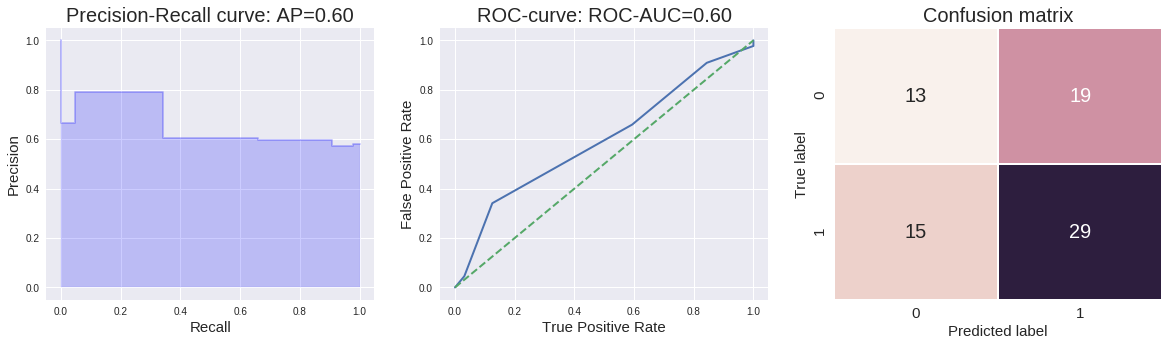

Processing metrics for best model parameters for SVC

              precision    recall  f1-score   support

     Control       0.00      0.00      0.00        32
    Glaucoma       0.58      1.00      0.73        44

   micro avg       0.58      0.58      0.58        76
   macro avg       0.29      0.50      0.37        76
weighted avg       0.34      0.58      0.42        76



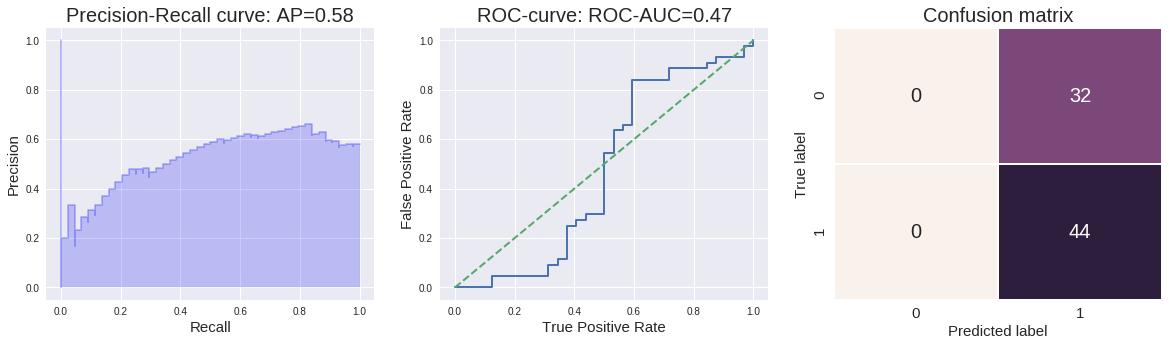

Processing metrics for best model parameters for KNeighborsClassifier

              precision    recall  f1-score   support

     Control       0.49      0.56      0.52        32
    Glaucoma       0.64      0.57      0.60        44

   micro avg       0.57      0.57      0.57        76
   macro avg       0.56      0.57      0.56        76
weighted avg       0.58      0.57      0.57        76



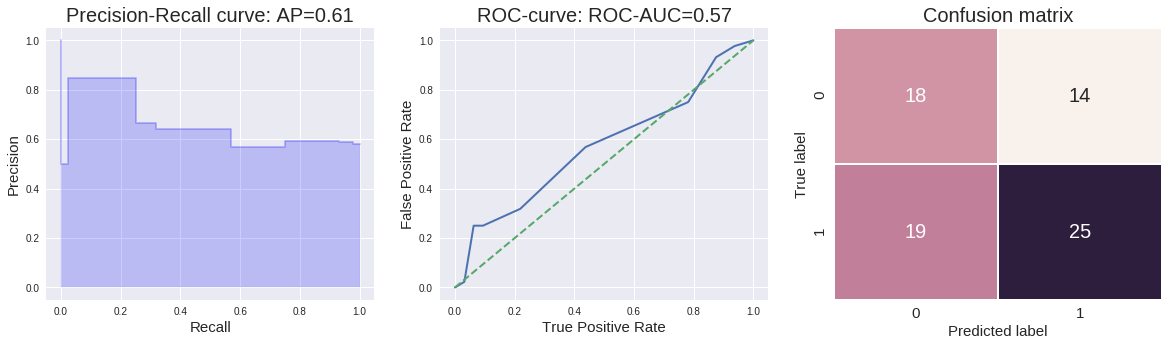

Processing metrics for best model parameters for LogisticRegression

              precision    recall  f1-score   support

     Control       0.42      0.50      0.46        32
    Glaucoma       0.58      0.50      0.54        44

   micro avg       0.50      0.50      0.50        76
   macro avg       0.50      0.50      0.50        76
weighted avg       0.51      0.50      0.50        76



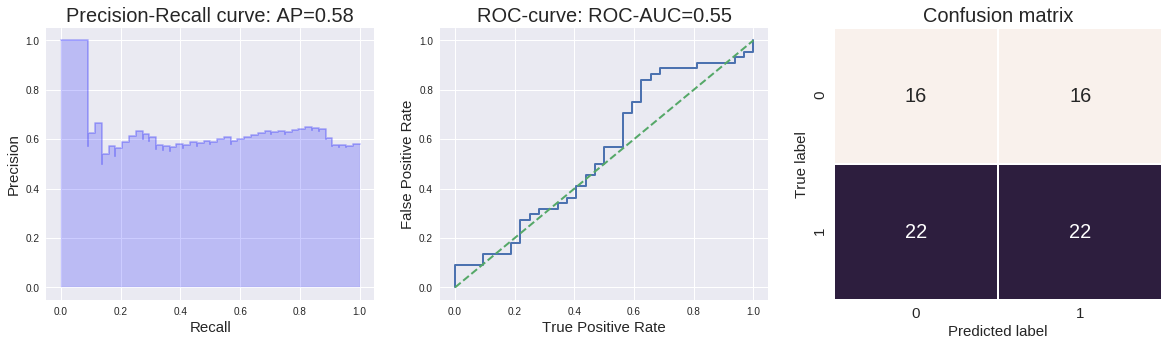

Processing metrics for best model parameters for XGBClassifier

              precision    recall  f1-score   support

     Control       0.44      0.22      0.29        32
    Glaucoma       0.58      0.80      0.67        44

   micro avg       0.55      0.55      0.55        76
   macro avg       0.51      0.51      0.48        76
weighted avg       0.52      0.55      0.51        76



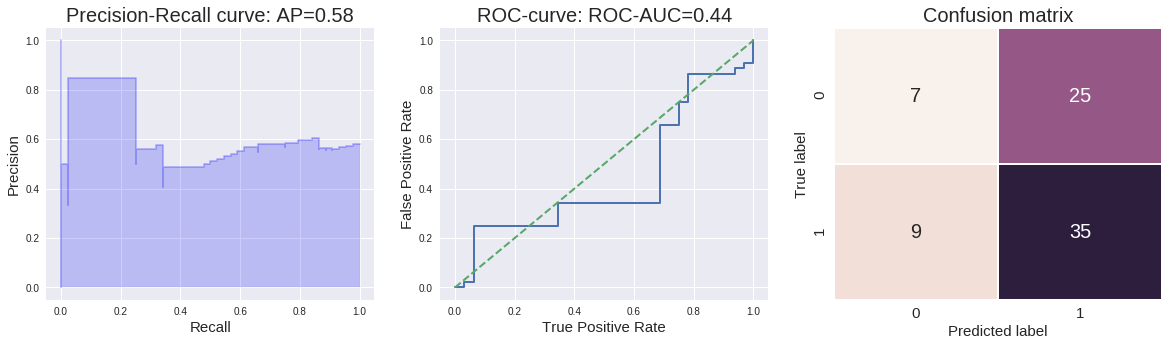

Processing metrics for best model parameters for GaussianNB

              precision    recall  f1-score   support

     Control       0.40      0.50      0.44        32
    Glaucoma       0.56      0.45      0.50        44

   micro avg       0.47      0.47      0.47        76
   macro avg       0.48      0.48      0.47        76
weighted avg       0.49      0.47      0.48        76



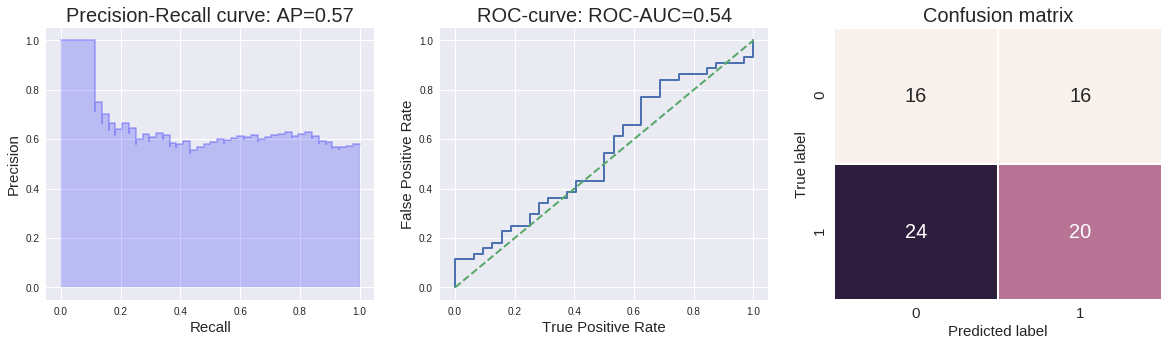

In [0]:
for best_model in best_models:
    print('Processing metrics for best model parameters for {}\n'.format(best_model.named_steps['classifier'].__class__.__name__))
    probas = repeated_cross_val_predict_proba(best_model, data_median, y, cv = LeaveOneOut())
    predicts = repeated_cross_val_predict(best_model, data_median, y, cv = LeaveOneOut())
    result_report(y, predicts, probas, filename = None)
    #result_report(y, predicts, probas, filename = best_model.named_steps['classifier'].__class__.__name__)

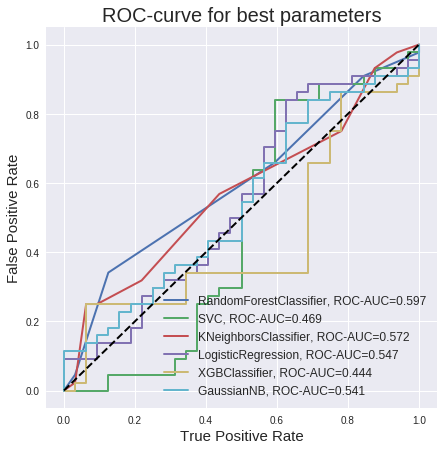

In [0]:
probas = []
for best_model in best_models:
    probas.append(repeated_cross_val_predict_proba(best_model, data_median, y, cv = LeaveOneOut()))
roc_concat(best_models, y, probas)